# Employee Attribution Prediction

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To display all rows
pd.set_option('display.max_rows',None)

In [3]:
#Importing train dataset
df=pd.read_csv('C:\\Users\\Priya Adhwaria\\Downloads\\Analytics Vidhya Assessment\\train_dataset.csv')
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [4]:
#Checking shape of the train dataframe
df.shape

(19104, 13)

In [5]:
#Importing test dataset
test_dataset=pd.read_csv('C:\\Users\\Priya Adhwaria\\Downloads\\Analytics Vidhya Assessment\\test_dataset.csv')
test_dataset.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [6]:
#Checking shape of test dataset
test_dataset.shape

(741, 1)

In [7]:
#Extracting values of test dataset with respect to 'Emp_ID' columns from train dataset 
test_dataset=pd.merge(test_dataset,df, how='left', on='Emp_ID')
test_dataset.head()

,Emp_ID,MMM-YY,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,394,2016-01-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,189360,1
1,394,2016-02-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,390810,1
2,394,2016-03-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,1846360,1
3,394,2016-04-01,33,Female,C20,Master,97722,2011-06-06,NaN,2,4,194010,2
4,394,2016-05-01,33,Female,C20,Master,97722,2011-06-06,NaN,2,4,371160,2


In [8]:
#Checking shape of test dataset after extracting values from train dataset
test_dataset.shape

(8588, 13)

In [9]:
#Train dataset after extracting values of test dataset from train dataset
df= df[~df['Emp_ID'].isin(test_dataset['Emp_ID'])]
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1


In [10]:
#Checking shape of final train dataset after removing values of test dataset
df.shape

(10516, 13)

# Train Dataset

In [11]:
#Checking train dataset
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1


In [12]:
#reset Index
df=df.reset_index(drop=True)

# EDA

In [13]:
#Checking shape of train dataset
df.shape

(10516, 13)

In [14]:
#Checkinng general information about train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10516 entries, 0 to 10515
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                10516 non-null  object
 1   Emp_ID                10516 non-null  int64 
 2   Age                   10516 non-null  int64 
 3   Gender                10516 non-null  object
 4   City                  10516 non-null  object
 5   Education_Level       10516 non-null  object
 6   Salary                10516 non-null  int64 
 7   Dateofjoining         10516 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   10516 non-null  int64 
 10  Designation           10516 non-null  int64 
 11  Total Business Value  10516 non-null  int64 
 12  Quarterly Rating      10516 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.0+ MB


In [15]:
#Checking value counts of the column
df['Gender'].value_counts()

Male      6144
Female    4372
Name: Gender, dtype: int64

In [16]:
#Checking value counts of the column
df['City'].value_counts()

C20    634
C26    529
C10    430
C27    429
C14    427
C1     407
C6     403
C22    380
C7     376
C3     375
C28    373
C23    372
C25    372
C12    358
C15    355
C13    346
C16    343
C4     326
C29    326
C17    323
C2     319
C5     309
C18    309
C24    305
C9     296
C21    279
C11    275
C8     271
C19    269
Name: City, dtype: int64

In [17]:
#Checking value counts of the column
df['Education_Level'].value_counts()

Master      3628
Bachelor    3528
College     3360
Name: Education_Level, dtype: int64

In [18]:
#Checking statistics values of columns of dataframe
df.describe()

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
count,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,1.051600e+04,10516.000000
mean,1421.849372,33.881229,59380.189996,1.702358,2.062381,3.437166e+05,1.644637
std,809.530151,6.229519,28708.364458,0.834719,0.969878,7.968340e+05,0.865628
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,734.000000,29.000000,38619.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1449.500000,33.000000,54355.000000,1.000000,2.000000,1.029100e+05,1.000000
75%,2131.000000,38.000000,76195.000000,2.000000,3.000000,4.065650e+05,2.000000
max,2787.000000,58.000000,167758.000000,5.000000,5.000000,1.607942e+07,4.000000


Text(0.5, 1.0, 'Histogram plot of Education_Level')

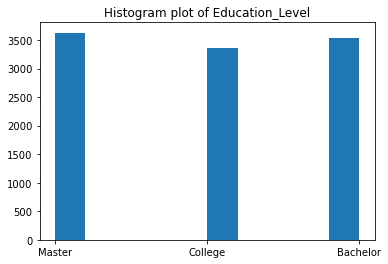

In [19]:
#Histogram plot of Education_Level
plt.hist(df['Education_Level'])
plt.title('Histogram plot of Education_Level')

Text(0.5, 1.0, 'Histogram plot of Gender')

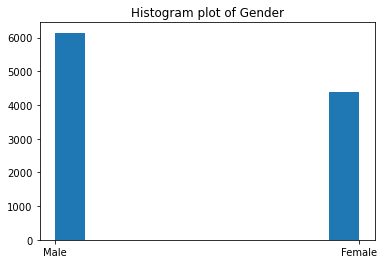

In [20]:
#Histogram plot of Gender
plt.hist(df['Gender'])
plt.title('Histogram plot of Gender')

Text(0.5, 1.0, 'Scatter plot of Age and Total Business Value')

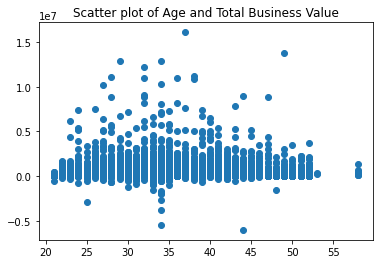

In [21]:
#Scatter plot of Age and Total Business Value
plt.scatter(df['Age'],df['Total Business Value'])
plt.title('Scatter plot of Age and Total Business Value')

Text(0.5, 1.0, 'Scatter plot of Age and Salary')

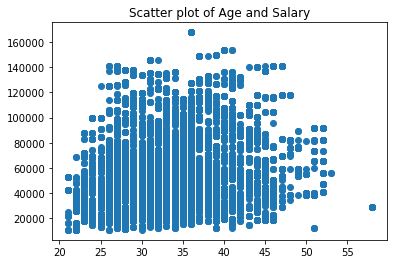

In [22]:
#Scatter plot of Age and Salary
plt.scatter(df['Age'],df['Salary'])
plt.title('Scatter plot of Age and Salary')

Text(0.5, 1.0, 'Lineplot of City and Salary')

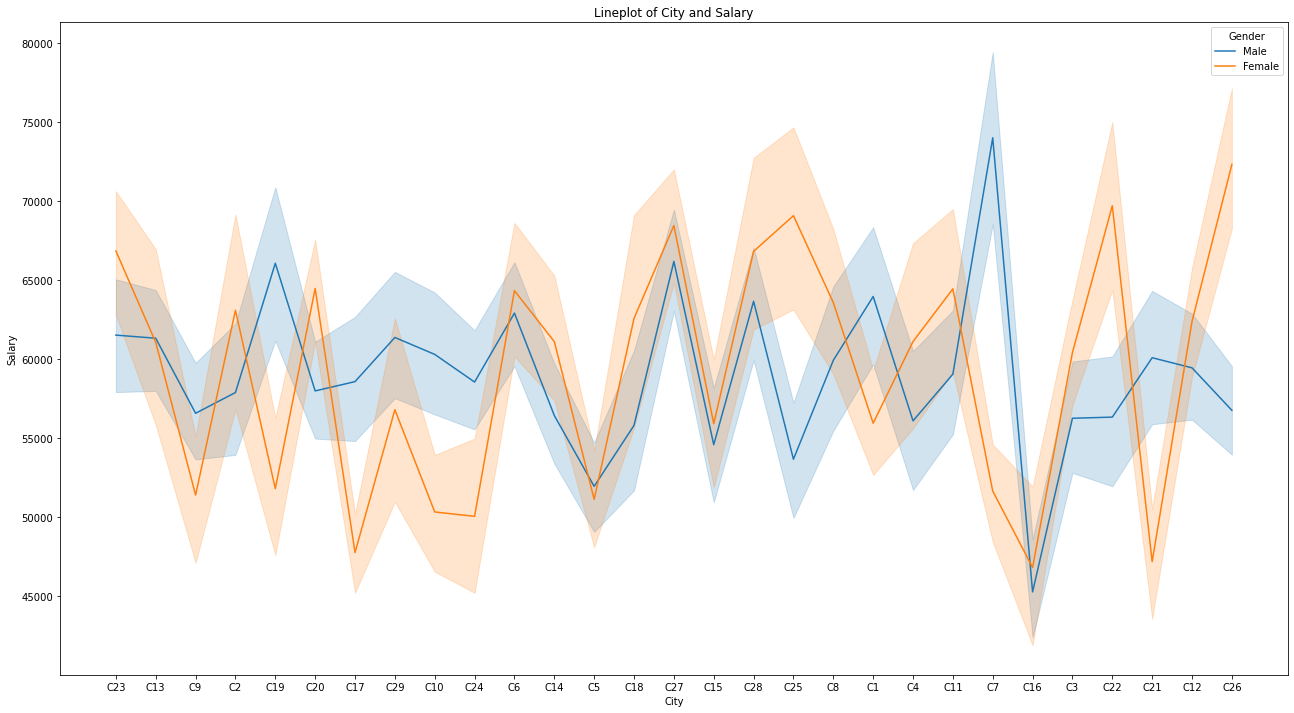

In [23]:
#Lineplot of City and Salary
plt.figure(figsize=[22,12])
sns.lineplot(x=df['City'],y=df['Salary'],hue=df['Gender'])
plt.title('Lineplot of City and Salary')

Text(0.5, 1.0, 'Lineplot of City and Age')

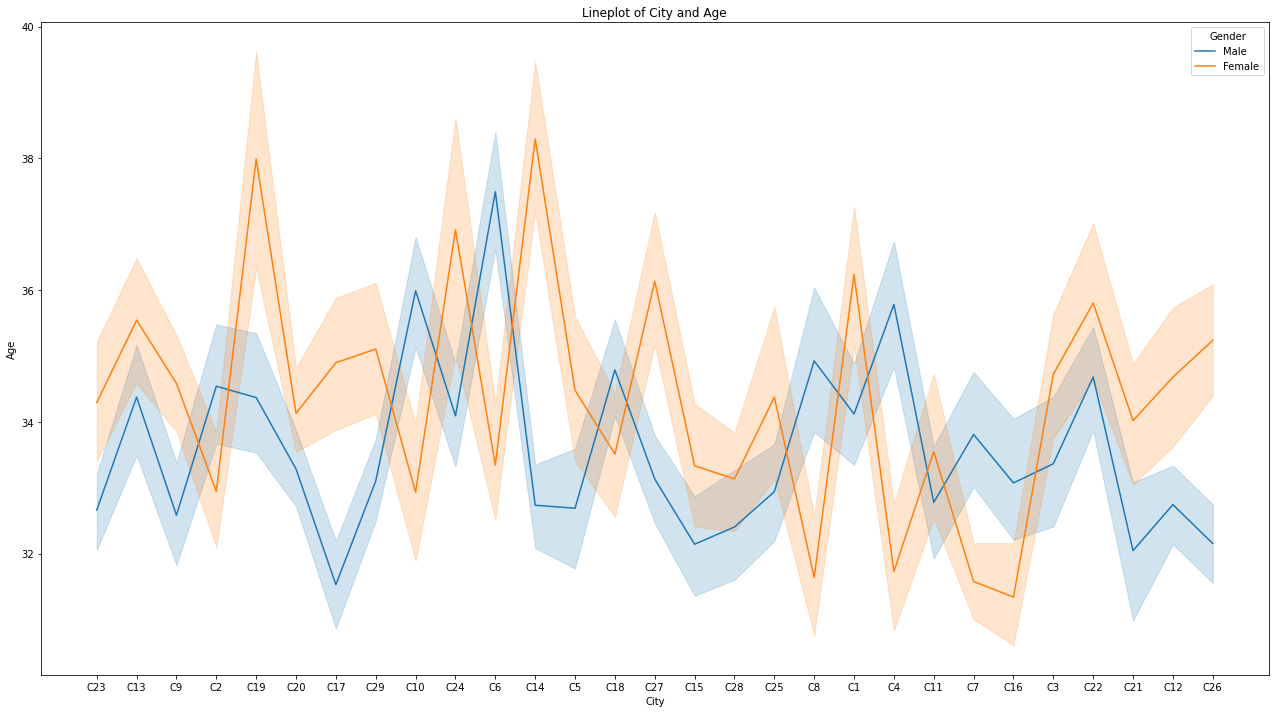

In [24]:
#Lineplot of City and Age
plt.figure(figsize=[22,12])
sns.lineplot(x=df['City'],y=df['Age'],hue=df['Gender'])
plt.title('Lineplot of City and Age')

Text(0.5, 1.0, 'Lineplot of Education_Level and Salary')

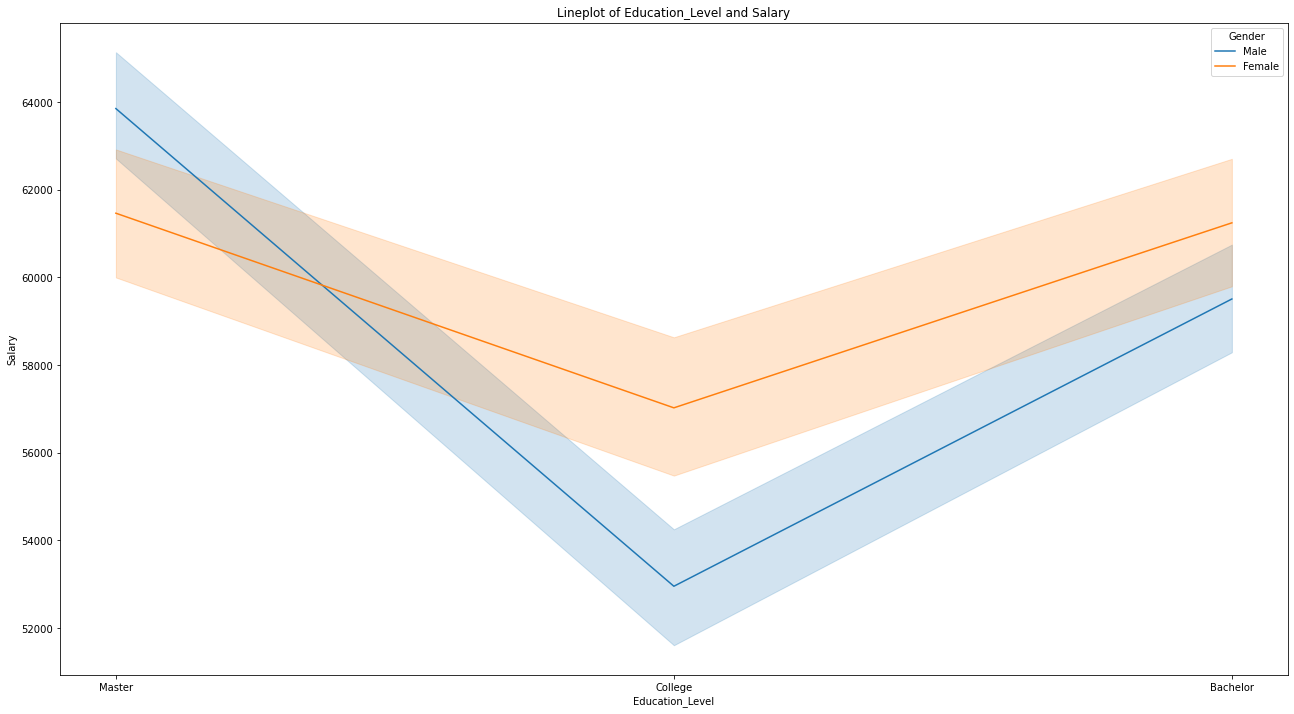

In [25]:
#Lineplot of Education_Level and Salary
plt.figure(figsize=[22,12])
sns.lineplot(x=df['Education_Level'],y=df['Salary'],hue=df['Gender'])
plt.title('Lineplot of Education_Level and Salary')

Text(0.5, 1.0, 'Lineplot of Education_Level and Total Business Value')

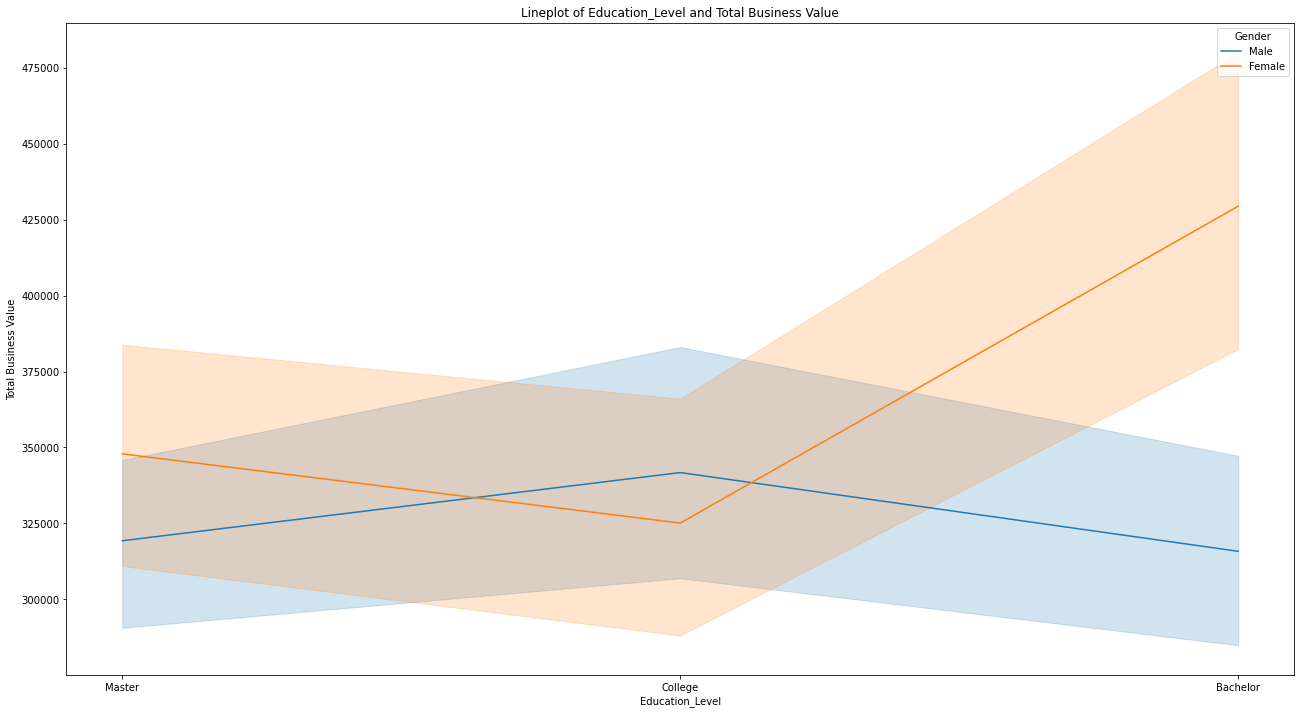

In [26]:
#Lineplot of Education_Level and Total Business Value
plt.figure(figsize=[22,12])
sns.lineplot(x=df['Education_Level'],y=df['Total Business Value'],hue=df['Gender'])
plt.title('Lineplot of Education_Level and Total Business Value')

Text(0.5, 1.0, 'Lineplot of Education_Level and Quarterly Rating')

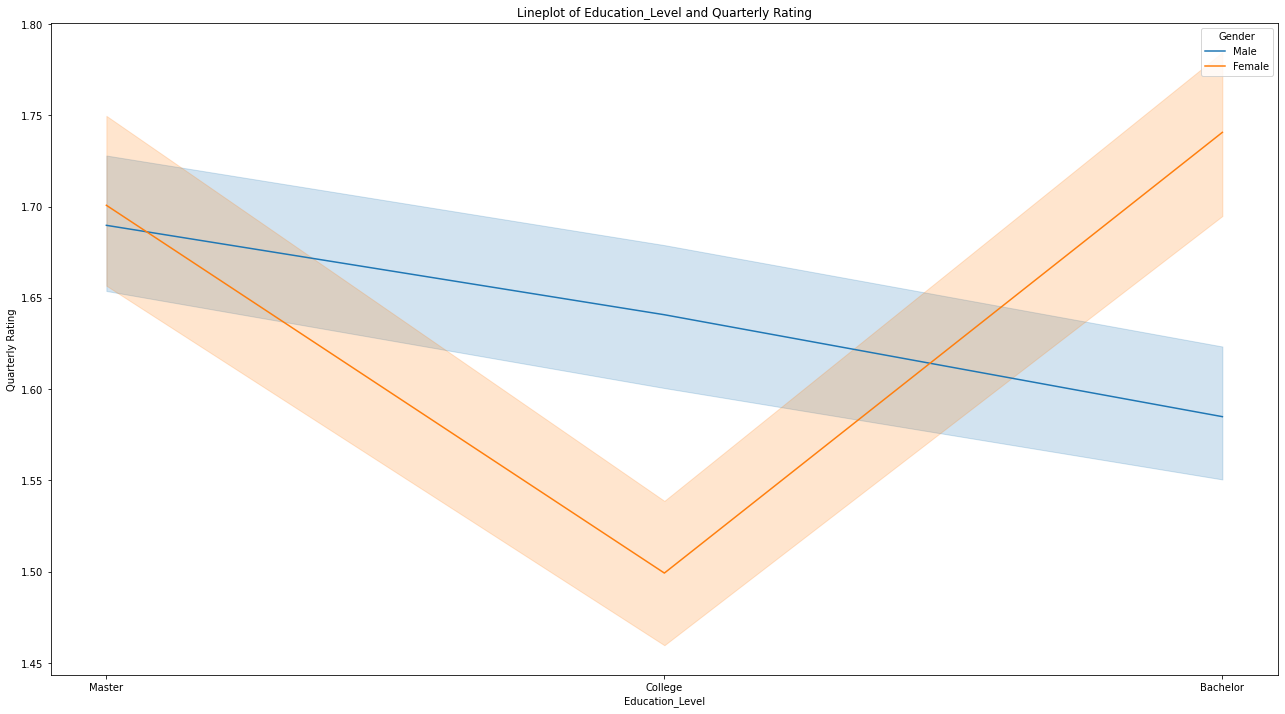

In [27]:
#Lineplot of Education_Level and Quarterly Rating
plt.figure(figsize=[22,12])
sns.lineplot(x=df['Education_Level'],y=df['Quarterly Rating'],hue=df['Gender'])
plt.title('Lineplot of Education_Level and Quarterly Rating')

# Feature Engineering

In [28]:
#Converting date column to datetime datatype
df['MMM-YY']=pd.to_datetime(df['MMM-YY'])
df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'])

In [29]:
#Checking datatypes
df.dtypes

MMM-YY                  datetime64[ns]
Emp_ID                           int64
Age                              int64
Gender                          object
City                            object
Education_Level                 object
Salary                           int64
Dateofjoining           datetime64[ns]
LastWorkingDate         datetime64[ns]
Joining Designation              int64
Designation                      int64
Total Business Value             int64
Quarterly Rating                 int64
dtype: object

In [30]:
#Checking Null Values
df.isna().sum()

MMM-YY                     0
Emp_ID                     0
Age                        0
Gender                     0
City                       0
Education_Level            0
Salary                     0
Dateofjoining              0
LastWorkingDate         8900
Joining Designation        0
Designation                0
Total Business Value       0
Quarterly Rating           0
dtype: int64

In [31]:
#Creating new column 'Target' with 0 value for employee still working in the company and 1 value for employee stopped working in company
df['Target']=np.where(df['LastWorkingDate'].isna(),0,1)

In [32]:
#Checking improved dataFrame
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,2,0,1,0
4,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,2,0,1,0


In [33]:
#Checking value counts of the column
df['Target'].value_counts()

0    8900
1    1616
Name: Target, dtype: int64

In [34]:
#Replacing NaN values in 'LastWorkingDate' column with backward 'value' with respect to a particular Emp_ID who has stopped working in the company
Employees= df['Emp_ID'].unique()

for i in Employees:
    df['LastWorkingDate'].loc[df['Emp_ID']==i]=df['LastWorkingDate'].loc[df['Emp_ID']==i].bfill()

In [35]:
#Checking improved dataFrame
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,0
4,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,0


In [36]:
#Creating a new column 'Tenure' containing total number of working  days by subtracting 'Dateofjoining' from 'LastWorkingDate'
df['Tenure']=np.where(df['LastWorkingDate'].notna(),(df['LastWorkingDate']-df['Dateofjoining'])/ np.timedelta64(1,'D'), np.nan)

In [37]:
#Checking improved dataFrame
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target,Tenure
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,2381060,2,0,78.0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,-665480,2,0,78.0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1,78.0
3,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,0,141.0
4,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,0,141.0


In [38]:
#Creating new column 'No_of_Promotions' by subtractin 'Joining Designation' from 'Designation'
df['No_of_Promotions']= df['Designation']-df['Joining Designation']

In [39]:
#Checking improved dataFrame
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target,Tenure,No_of_Promotions
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,2381060,2,0,78.0,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,-665480,2,0,78.0,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1,78.0,0
3,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,0,141.0,0
4,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,0,141.0,0


In [40]:
#Checking value counts of the column
df['No_of_Promotions'].value_counts()

0    8024
1    1527
2     650
3     301
4      14
Name: No_of_Promotions, dtype: int64

In [41]:
#Dropping unnecessary columns, since I don't need these columns further
df=df.drop(['Joining Designation','Designation','MMM-YY','Dateofjoining','LastWorkingDate'], axis=1)

In [42]:
#Checking Null Values
df.isna().sum()

Emp_ID                    0
Age                       0
Gender                    0
City                      0
Education_Level           0
Salary                    0
Total Business Value      0
Quarterly Rating          0
Target                    0
Tenure                  157
No_of_Promotions          0
dtype: int64

In [43]:
#Replacings null values with mean value 
df['Tenure']=df.fillna(df['Tenure'].mean())

In [44]:
#Checking Null Values
df.isna().sum()

Emp_ID                  0
Age                     0
Gender                  0
City                    0
Education_Level         0
Salary                  0
Total Business Value    0
Quarterly Rating        0
Target                  0
Tenure                  0
No_of_Promotions        0
dtype: int64

In [45]:
#Applying Label Encoding to the column
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Education_Level']=le.fit_transform(df['Education_Level'])

In [46]:
#Appling One Hot Encoding to the columns
df=pd.get_dummies(df, columns=['Gender','City'], drop_first=True)

In [47]:
#Checking improved dataFrame
df.head()

,Emp_ID,Age,Education_Level,Salary,Total Business Value,Quarterly Rating,Target,Tenure,No_of_Promotions,Gender_Male,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,1,28,2,57387,2381060,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,28,2,57387,-665480,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,28,2,57387,0,2,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,43,2,65603,0,1,0,4,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,43,2,65603,0,1,0,4,0,1,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#Grouping the test dataset by 'Emp_ID' column
df=df.groupby('Emp_ID', sort=False).mean().astype(int)

In [49]:
df.head()

,Age,Education_Level,Salary,Total Business Value,Quarterly Rating,Target,No_of_Promotions,Gender_Male,City_C10,City_C11,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
Emp_ID,,,,,,,,,,,,,,,,,,,,,
1,28,2,57387,571860,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,43,2,65603,70000,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,29,1,46368,40120,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8,34,1,70656,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,35,2,28116,434530,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#reset Index
df=df.reset_index(drop=False)

In [51]:
#Checking shape of dataset
df.shape

(1640, 37)

In [52]:
#Checking statistical values of columns of dataframe
df.describe()

,Emp_ID,Age,Education_Level,Salary,Total Business Value,Quarterly Rating,Target,No_of_Promotions,Gender_Male,City_C10,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
count,1640.000000,1640.000000,1640.000000,1640.000000,1.640000e+03,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,...,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000
mean,1413.869512,32.938415,1.015244,55542.964634,2.099772e+05,1.195732,0.062195,0.201829,0.587805,0.038415,...,0.037195,0.036585,0.031098,0.032927,0.032317,0.030488,0.033537,0.032317,0.032927,0.032317
std,804.707487,5.938406,0.814234,27065.783465,3.226032e+05,0.452887,0.241583,0.573034,0.492380,0.192254,...,0.189297,0.187799,0.173634,0.178500,0.176895,0.171978,0.180088,0.176895,0.178500,0.176895
min,1.000000,21.000000,0.000000,10747.000000,-1.979320e+05,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,728.500000,29.000000,0.000000,36117.500000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1435.500000,32.000000,1.000000,51663.500000,1.006475e+05,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2113.500000,37.000000,2.000000,70169.500000,3.056370e+05,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2787.000000,58.000000,2.000000,167758.000000,3.759614e+06,4.000000,1.000000,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

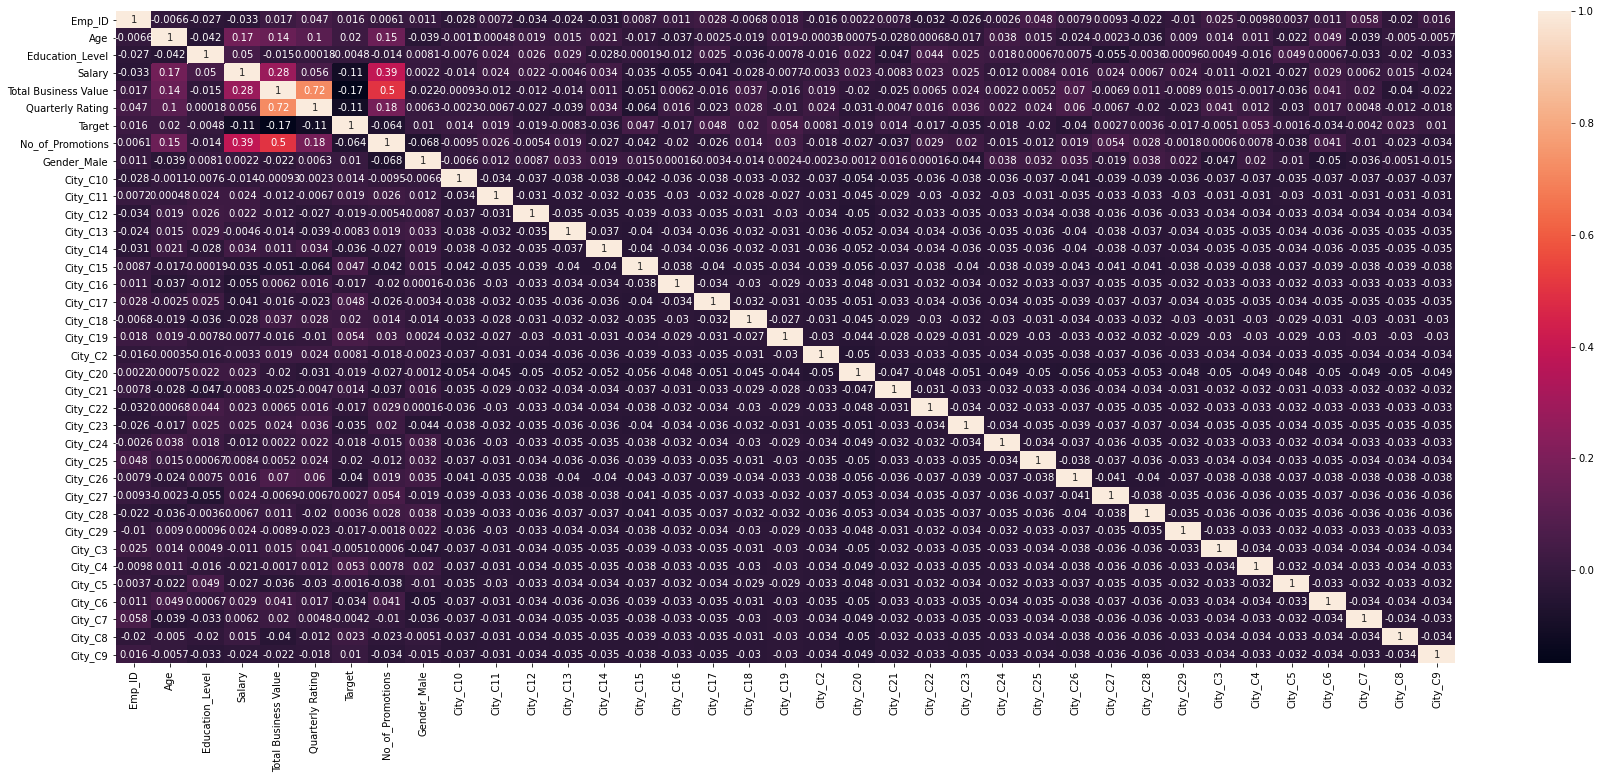

In [53]:
#Checking correlation of columns of dataframe

corr=df.corr()
plt.figure(figsize=[30,12])
sns.heatmap(corr, annot=True)


In [54]:
#Checking correlation of columns of dataframe with respect to 'Target' column
corr=df.corr()
corr['Target'].sort_values(ascending=False)

Target                  1.000000
City_C19                0.054147
City_C4                 0.052877
City_C17                0.047623
City_C15                0.046640
City_C8                 0.023225
Age                     0.020108
City_C18                0.019741
City_C11                0.018565
Emp_ID                  0.016101
City_C10                0.014210
City_C21                0.014124
Gender_Male             0.010484
City_C9                 0.010046
City_C2                 0.008124
City_C28                0.003608
City_C27                0.002750
City_C5                -0.001612
City_C7                -0.004231
Education_Level        -0.004823
City_C3                -0.005073
City_C13               -0.008302
City_C22               -0.017046
City_C29               -0.017046
City_C16               -0.017046
City_C24               -0.017783
City_C20               -0.019133
City_C12               -0.019222
City_C25               -0.019924
City_C6                -0.033948
City_C23  

<AxesSubplot:>

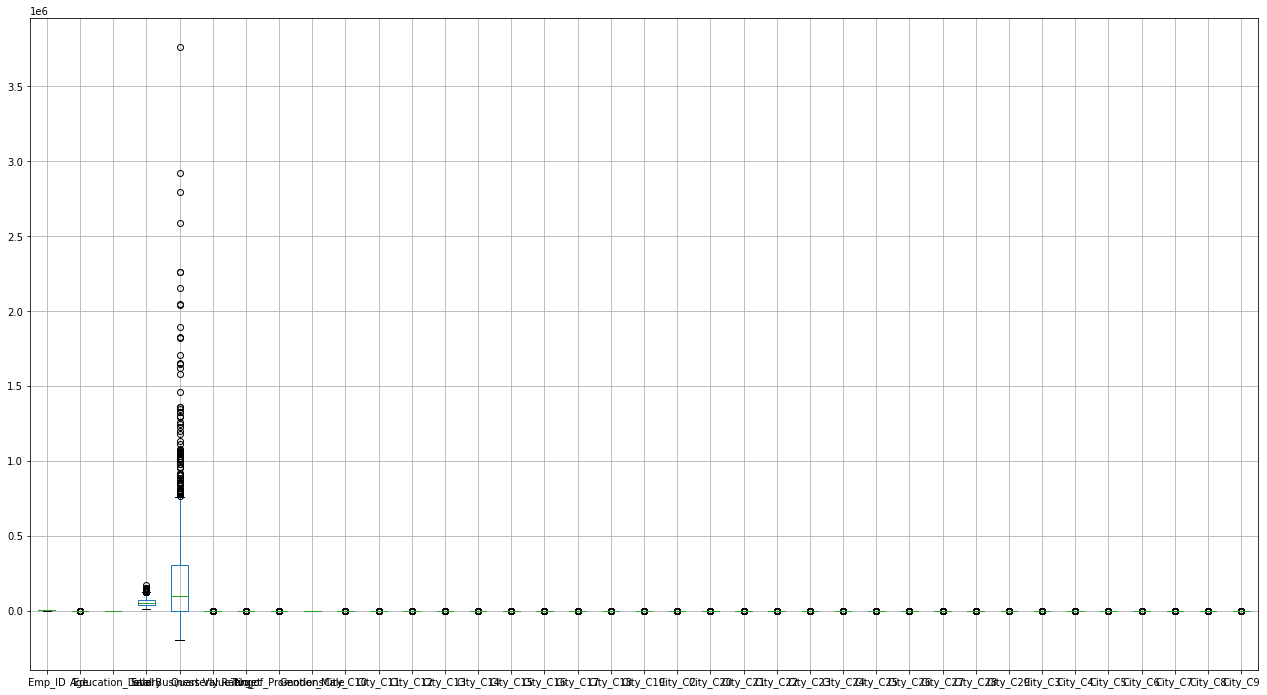

In [55]:
#Checking outliers of the columns with boxplot

plt.figure(figsize=[22,12])
df.iloc[:,0::].boxplot()


In [56]:
#X-Y split
x=df.drop('Target',axis=1)
y=df['Target']

In [57]:
#Checking skewness of all columns of the dataset
x.skew()

Emp_ID                 -0.045016
Age                     0.546261
Education_Level        -0.027950
Salary                  0.841309
Total Business Value    3.623244
Quarterly Rating        2.349739
No_of_Promotions        3.264795
Gender_Male            -0.357090
City_C10                4.807699
City_C11                5.790854
City_C12                5.239717
City_C13                5.035762
City_C14                5.035762
City_C15                4.566199
City_C16                5.407628
City_C17                5.084803
City_C18                5.862008
City_C19                6.011655
City_C2                 5.186722
City_C20                3.445153
City_C21                5.527755
City_C22                5.407628
City_C23                5.084803
City_C24                5.350099
City_C25                5.186722
City_C26                4.643236
City_C27                4.895683
City_C28                4.941251
City_C29                5.407628
City_C3                 5.239717
City_C4   

In [58]:
#Improving Skewness
columns=['Salary','Total Business Value','Quarterly Rating','No_of_Promotions']

from sklearn.preprocessing import power_transform
pt=power_transform(x[columns], method='yeo-johnson')
x[columns]=pd.DataFrame(pt, columns=x[columns].columns)
x.skew()

Emp_ID                 -0.045016
Age                     0.546261
Education_Level        -0.027950
Salary                 -0.018885
Total Business Value    0.085917
Quarterly Rating        1.729050
No_of_Promotions        2.126017
Gender_Male            -0.357090
City_C10                4.807699
City_C11                5.790854
City_C12                5.239717
City_C13                5.035762
City_C14                5.035762
City_C15                4.566199
City_C16                5.407628
City_C17                5.084803
City_C18                5.862008
City_C19                6.011655
City_C2                 5.186722
City_C20                3.445153
City_C21                5.527755
City_C22                5.407628
City_C23                5.084803
City_C24                5.350099
City_C25                5.186722
City_C26                4.643236
City_C27                4.895683
City_C28                4.941251
City_C29                5.407628
City_C3                 5.239717
City_C4   

We have improved skewness using Power Transform. Here, power transform will also improve outliers of columns in train dataset. 

In [59]:
#train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.3)

In [60]:
#Scaling x values
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
scaled_x_train=std.fit_transform(x_train)
scaled_x_test=std.transform(x_test)

x_train=pd.DataFrame(scaled_x_train, columns=x_train.columns)
x_test=pd.DataFrame(scaled_x_test, columns=x_test.columns)

# ML Models

In [61]:
#Importing Libraries required for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [62]:
#Random Forest Classifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
#Finding importance of columns
imp_feature=pd.DataFrame(rfc.feature_importances_,index=x_train.columns,columns=['Important_Feature']).sort_values('Important_Feature',ascending=False)
imp_feature

,Important_Feature
Salary,0.197501
Emp_ID,0.182917
Age,0.154524
Total Business Value,0.113466
Education_Level,0.052995
Gender_Male,0.034009
City_C15,0.019135
City_C19,0.016287
No_of_Promotions,0.014883
City_C18,0.013766


In [64]:
#Selecting important columns in x_train and x_test 
x_train=x_train[['Salary','Age','Total Business Value']]
x_test=x_test[['Salary','Age','Total Business Value']]

In [65]:
#Random Forest Classifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy Score :', accuracy_score(y_test,predrfc))
print('Confusion Matrix :', confusion_matrix(y_test,predrfc))
print('Classification Report :', classification_report(y_test,predrfc))

Accuracy Score : 0.9247967479674797
Confusion Matrix : [[454  13]
 [ 24   1]]
Classification Report :               precision    recall  f1-score   support

           0       0.95      0.97      0.96       467
           1       0.07      0.04      0.05        25

    accuracy                           0.92       492
   macro avg       0.51      0.51      0.51       492
weighted avg       0.91      0.92      0.91       492



In [66]:
#Parameters used for Random Forest Classifier
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [67]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print('Accuracy Score :', accuracy_score(y_test,predlr))
print('Confusion Matrix :', confusion_matrix(y_test,predlr))
print('Classification Report :', classification_report(y_test,predlr))

Accuracy Score : 0.9491869918699187
Confusion Matrix : [[466   1]
 [ 24   1]]
Classification Report :               precision    recall  f1-score   support

           0       0.95      1.00      0.97       467
           1       0.50      0.04      0.07        25

    accuracy                           0.95       492
   macro avg       0.73      0.52      0.52       492
weighted avg       0.93      0.95      0.93       492



In [68]:
#Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy Score :', accuracy_score(y_test,preddtc))
print('Confusion Matrix :', confusion_matrix(y_test,preddtc))
print('Classification Report :', classification_report(y_test,preddtc))

Accuracy Score : 0.9146341463414634
Confusion Matrix : [[449  18]
 [ 24   1]]
Classification Report :               precision    recall  f1-score   support

           0       0.95      0.96      0.96       467
           1       0.05      0.04      0.05        25

    accuracy                           0.91       492
   macro avg       0.50      0.50      0.50       492
weighted avg       0.90      0.91      0.91       492



In [69]:
#SVC Model
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy Score :', accuracy_score(y_test,predsvc))
print('Confusion Matrix :', confusion_matrix(y_test,predsvc))
print('Classification Report :', classification_report(y_test,predsvc))

Accuracy Score : 0.9491869918699187
Confusion Matrix : [[467   0]
 [ 25   0]]
Classification Report :               precision    recall  f1-score   support

           0       0.95      1.00      0.97       467
           1       0.00      0.00      0.00        25

    accuracy                           0.95       492
   macro avg       0.47      0.50      0.49       492
weighted avg       0.90      0.95      0.92       492



We can notice that accuracy score of all models are good and approximately same. But SVC and Logistic Regression models have 0 precision, recall, f1 score value for '1'. That's why we ignore these two models. And proceed with Random Forest Classifier and Decision Tree Classifier model and check cross validation score.

# Cross Validation Score

In [70]:
#Cross validation using Random Forest Classifier
from sklearn.model_selection import cross_val_score
src1=cross_val_score(rfc,x_train,y_train,cv=5)
src2=cross_val_score(rfc,x_test,y_test,cv=5)
print('Cross Validation Score of train dataset:', src1.mean())
print('Cross Validation Score of test dataset:', src2.mean())

Cross Validation Score of train dataset: 0.928570343649136
Cross Validation Score of test dataset: 0.9370026798598229


In [71]:
#Cross validation using Decision Tree Classifier
src1=cross_val_score(dtc,x_train,y_train,cv=5)
src2=cross_val_score(dtc,x_test,y_test,cv=5)
print('Cross Validation Score of train dataset:', src1.mean())
print('Cross Validation Score of test dataset:', src2.mean())

Cross Validation Score of train dataset: 0.8911410670210745
Cross Validation Score of test dataset: 0.9248402391259534


We can notice that cross validation score for train dataset of Random Forest Classifier is greater than Decision Tree Classifier, that's why I will proceed with Random Forest Classifier model. 

Since cross validation score of Random Forest Classifier is little more than accuracy score of the model. It means, model is little underfitting the data points. To improve this I will do Hyper Parameter tuning.

# Hyper Tuning Parameter

In [72]:
#Grid SearchCV using Random Forest Classifier
from sklearn.model_selection import GridSearchCV
parameter={'bootstrap': [True],
 'ccp_alpha': [0.0],
 'class_weight': [None],
 'criterion': ['gini','entropy'],
 'max_depth': [30],
 'max_features': ['auto'],
 'max_leaf_nodes': [None],
 'max_samples': [None],
 'min_impurity_decrease': [0.0],
 'min_impurity_split': [None],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'min_weight_fraction_leaf': [0.0],
 'n_estimators': [100],
 'n_jobs': [10],
 'oob_score': [False],
 'random_state': [100],
 'verbose': [0],
 'warm_start': [False]}
gcv=GridSearchCV(rfc,parameter,cv=5)
gcv.fit(x_train,y_train)
gcv.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 10,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

In [73]:
#Predicting values from Grid SearchCV
predgcv=gcv.best_estimator_.predict(x_test)
print('Accuracy Score :', accuracy_score(y_test,predgcv))
print('Confusion Matrix :', confusion_matrix(y_test,predgcv))
print('Classification Report :', classification_report(y_test,predgcv))

Accuracy Score : 0.9247967479674797
Confusion Matrix : [[454  13]
 [ 24   1]]
Classification Report :               precision    recall  f1-score   support

           0       0.95      0.97      0.96       467
           1       0.07      0.04      0.05        25

    accuracy                           0.92       492
   macro avg       0.51      0.51      0.51       492
weighted avg       0.91      0.92      0.91       492



# Conclusion

(array([478.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

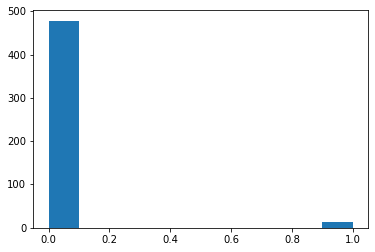

In [74]:
#Histogram plot of predicted values of train dataset
plt.hist(predgcv)

From the graph, it is clear that employee who will stop working in the company is much less than employee who are still working in the company.

# Saving  Model

In [75]:
#Importing joblib
import joblib

In [76]:
#Saving Model
joblib.dump(gcv.best_estimator_,'Employee_Attrition_Prediction.pk')

['Employee_Attrition_Prediction.pk']

# Test Dataset

In [77]:
#Checking test dataset
test_dataset.head()

,Emp_ID,MMM-YY,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,394,2016-01-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,189360,1
1,394,2016-02-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,390810,1
2,394,2016-03-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,1846360,1
3,394,2016-04-01,33,Female,C20,Master,97722,2011-06-06,NaN,2,4,194010,2
4,394,2016-05-01,33,Female,C20,Master,97722,2011-06-06,NaN,2,4,371160,2


In [78]:
#Applying Label Encoding to the column
test_dataset['Education_Level']=le.transform(test_dataset['Education_Level'])

In [79]:
#Checking improved test dataset
test_dataset.head()

,Emp_ID,MMM-YY,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,394,2016-01-01,32,Female,C20,2,97722,2011-06-06,NaN,2,4,189360,1
1,394,2016-02-01,32,Female,C20,2,97722,2011-06-06,NaN,2,4,390810,1
2,394,2016-03-01,32,Female,C20,2,97722,2011-06-06,NaN,2,4,1846360,1
3,394,2016-04-01,33,Female,C20,2,97722,2011-06-06,NaN,2,4,194010,2
4,394,2016-05-01,33,Female,C20,2,97722,2011-06-06,NaN,2,4,371160,2


In [80]:
#Grouping the test dataset by 'Emp_ID' column
test_dataset=test_dataset.groupby('Emp_ID', sort=False).mean().astype(int)

In [81]:
#Checking improved test dataset
test_dataset.head()

,Age,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
Emp_ID,,,,,,,
394,33,2,97722,2,4,1144092,2
173,38,1,56174,1,3,827762,2
1090,37,1,96750,2,4,2099270,2
840,39,1,88813,1,4,713918,1
308,30,2,188418,2,5,2417687,2


In [82]:
#reset Index
test_dataset=test_dataset.reset_index(drop=False)

In [83]:
#Checking improved test dataset
test_dataset.head()

,Emp_ID,Age,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,394,33,2,97722,2,4,1144092,2
1,173,38,1,56174,1,3,827762,2
2,1090,37,1,96750,2,4,2099270,2
3,840,39,1,88813,1,4,713918,1
4,308,30,2,188418,2,5,2417687,2


In [84]:
#Checking shape of test dataset
test_dataset.shape

(741, 8)

In [85]:
#Selecting required columns
df_test=test_dataset[['Salary','Age','Total Business Value']]

In [86]:
#Checking improved test dataset
df_test.head()

,Salary,Age,Total Business Value
0,97722,33,1144092
1,56174,38,827762
2,96750,37,2099270
3,88813,39,713918
4,188418,30,2417687


In [87]:
#Checking null values
df_test.isna().sum()

Salary                  0
Age                     0
Total Business Value    0
dtype: int64

In [88]:
#Checking Skewness of columns
df_test.skew()

Salary                  0.651702
Age                     0.496344
Total Business Value    1.676584
dtype: float64

In [89]:
#Improving Skewness
columns=['Salary','Total Business Value']

from sklearn.preprocessing import power_transform
pt=power_transform(df_test[columns], method='yeo-johnson')
df_test[columns]=pd.DataFrame(pt, columns=df_test[columns].columns)
df_test.skew()

Salary                 -0.017374
Age                     0.496344
Total Business Value   -0.756926
dtype: float64

In [90]:
#Scaling the test dataframe
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
df_test=std.fit_transform(df_test)

In [91]:
#Loading the model
model=joblib.load('Employee_Attrition_Prediction.pk')

In [92]:
#Predicting values using model
final_pred= model.predict(df_test)

In [93]:
#Converting predicted values into dataframe
predicted_values=pd.DataFrame(final_pred,columns=['Target'])

In [94]:
#Inserting new column 'Emp_Id' in the dataframe having predicted values
predicted_values.insert(0,'Emp_ID',test_dataset['Emp_ID'])

In [95]:
#Checking dataset having predicted values with respect to Emp_ID
predicted_values.head()

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0


# Final Conclusion:

(array([738.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

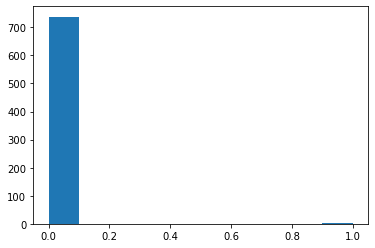

In [96]:
#Histogram plot of predicted values of test dataset
plt.hist(predicted_values['Target'])

Our final model is Random Forest Classifier, fitting the data points with '92%' f1 score of accuracy. We can notice that number of employee who will stop working in the company is much less than number of employee who are still working in company.

# Saving Final Dataframe

In [97]:
#Saving dataframe having predicted values as csv file
predicted_values.to_csv('Employee_Attribution_Prediction.csv',index=False)